Rohan Bangera

In [ ]:
# import packages
import numpy as np
import pandas as pd

from scipy.optimize import minimize
from scipy.optimize import fsolve
import scipy.stats as stats

import statsmodels.api as sm
import matplotlib.pyplot as plt
from functools import partial

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Use Python to answer the following questions. Show the code and provide complete sentences as your answers. Submit the .ipynb to Canvas. 

# Q1

If the weekly sales quantity of a product follows a Normal distribution with $\mu = 100$ and $\sigma = 10$.

a) What is the probalitiy that the sales quantity is between 90 and 95 in a week?   
b) What is the minimum quantity the manager should keep in the inventory at the start of a week so that the probability of stockout (sales greater than inventory) is less than 10%?

In [ ]:
#A
from scipy.special import ndtr
lower = 90
upper = 95 
mean = 100
sd = 10
p1 = (lower-mean)/sd
p1
p2 = (upper-mean)/sd
p2
norm_dist = np.random.normal(mean, sd, upper)
p_lower = 1-ndtr(p1)
p_upper = 1-ndtr(p2)
prob = p_lower - p_upper
print('A) Probability that the sales quantity is between 90 and 95 in a week is',+prob)

#B
Z = abs(stats.norm.ppf(0.1,0,1))
min = mean + Z * sd
print('B) Minimum quantity the manager should keep in the inventory at the start of a week is', +min)

A) Probability that the sales quantity is between 90 and 95 in a week is 0.1498822847945298
B) Minimum quantity the manager should keep in the inventory at the start of a week is 112.815515655446


# Q2
Suppose that in Hoboken, the number of traffic accidents can be approximated by a Poisson distribution with λ = 2.5 per month. 

a) What is the probability of five or more than five traffic accidents in one month?   
b) What is the median number of traffic accidents in one month?

In [ ]:
#A
prob = 1 - (stats.poisson.pmf(0,2.5) + stats.poisson.pmf(1,2.5) + stats.poisson.pmf(2,2.5) + stats.poisson.pmf(3,2.5) + stats.poisson.pmf(4,2.5))
print('A) Probability of five or more than five traffic accidents in one month is',+prob)
#B
median = stats.poisson.median(mu=2.5, loc=0)
print('B) Median number of traffic accidents in one month is',+median)

A) Probability of five or more than five traffic accidents in one month is 0.10882198108584884
B) Median number of traffic accidents in one month is 2.0


# Q3.

Assuming that the following data (raw_data_hw) is generated by a Beta distribution, find the MLE for a and b.

Hints: 
1. You need to use the [scipy.stats.beta class](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html).  
2. The 'true' parameters are a = 4, b = 2. You estimates shouldn't be far off. 

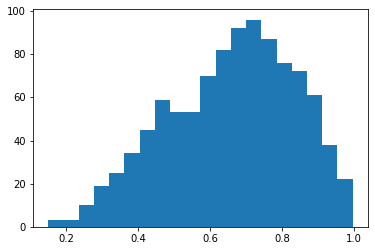

In [ ]:
raw_data_hw = np.loadtxt('https://fmai-teaching.s3.amazonaws.com/bia652/est/b.txt')
histogram = plt.hist(raw_data_hw, bins=20)

In [ ]:
def negLL_Beta(params, raw_data):
  alpha = params[0]
  beta = params[1]
  LL = np.sum(stats.beta.logpdf(raw_data,alpha,beta,loc=0,scale=1))
  negLL = -LL
  return(negLL)
result = minimize(partial(negLL_Beta, raw_data=raw_data_hw), x0 = (0, 1), method = 'Nelder-Mead', options={'disp': True})
print("\n", 
      "The parameters we get from MLE: ", "\n", 
      "MLE estimate a: ", result['x'][0], "\n",
      "MLE estimate b: ", result['x'][1], "\n"
      )

Optimization terminated successfully.
         Current function value: -365.424546
         Iterations: 73
         Function evaluations: 136

 The parameters we get from MLE:  
 MLE estimate a:  4.080323146060941 
 MLE estimate b:  2.093581799333127 

